### Segment Anything Model for Geospatial Data

This notebook shows how to use segment satellite imagery using the Segment Anything Model (SAM). Use the this Colab link to view the interactive maps

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/10ppLZlpmxe_97v1QnytHFVsMo1cO4RmK?usp=sharing)

### Install dependencies

Uncomment and run the following cell to install the required dependencies.


In [ ]:
%pip install segment-geospatial

### Import libraries

In [ ]:
import os
import leafmap
from samgeo import SamGeo, tms_to_geotiff, get_basemaps

### Create an interactive map

In [ ]:
m = leafmap.Map(center=[29.676840, -95.369222], zoom=19)

# map of New Jersey
# m = leafmap.Map(center=[39.833851, -74.871826], zoom = 19)
m.add_basemap("SATELLITE")
m

Map(center=[29.67684, -95.369222], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

Pan and zoom the map to select the area of interest. Use the draw tools to draw a polygon or rectangle on the map

In [ ]:
m.user_roi_bounds()

In [ ]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
else:
    bbox = [-95.3704, 29.6762, -95.368, 29.6775]

### Download map tiles

Download maps tiles and mosaic them into a single GeoTIFF file

In [ ]:
image = "satellite.tif"

Besides the `satellite` basemap, you can use any of the following basemaps returned by the `get_basemaps()` function:

In [ ]:
# get_basemaps().keys()

Specify the basemap as the source.

In [ ]:
tms_to_geotiff(output=image, bbox=bbox, zoom=20, source="Satellite", overwrite=True)

Downloaded image 01/40
Downloaded image 02/40
Downloaded image 03/40
Downloaded image 04/40
Downloaded image 05/40
Downloaded image 06/40
Downloaded image 07/40
Downloaded image 08/40
Downloaded image 09/40
Downloaded image 10/40
Downloaded image 11/40
Downloaded image 12/40
Downloaded image 13/40
Downloaded image 14/40
Downloaded image 15/40
Downloaded image 16/40
Downloaded image 17/40
Downloaded image 18/40
Downloaded image 19/40
Downloaded image 20/40
Downloaded image 21/40
Downloaded image 22/40
Downloaded image 23/40
Downloaded image 24/40
Downloaded image 25/40
Downloaded image 26/40
Downloaded image 27/40
Downloaded image 28/40
Downloaded image 29/40
Downloaded image 30/40
Downloaded image 31/40
Downloaded image 32/40
Downloaded image 33/40
Downloaded image 34/40
Downloaded image 35/40
Downloaded image 36/40
Downloaded image 37/40
Downloaded image 38/40
Downloaded image 39/40
Downloaded image 40/40
Saving GeoTIFF. Please wait...
Image saved to satellite.tif


You can also use your own image. Uncomment and run the following cell to use your own image.

In [ ]:
# image = '/path/to/your/own/image.tif'

Display the downloaded image on the map.

In [ ]:
image = '/content/satellite.tif'
m.layers[-1].visible = False  # turn off the basemap
m.add_raster(image, layer_name="Image")
m

Map(bottom=27757293.0, center=[29.67641547500351, -95.36908278232833], controls=(ZoomControl(options=['positio…

In [ ]:
leafmap.download_file(
    url="https://github.com/opengeos/data/blob/main/naip/agriculture.tif",
    quiet=True,
    overwrite=True,
)

'/content/agriculture.tif'

In [ ]:
image_agriculture = '/content/agriculture.tif'
tms_to_geotiff(output=image_agriculture, bbox=bbox, zoom=20, source="Satellite", overwrite=True)

Downloaded image 01/40
Downloaded image 02/40
Downloaded image 03/40
Downloaded image 04/40
Downloaded image 05/40
Downloaded image 06/40
Downloaded image 07/40
Downloaded image 08/40
Downloaded image 09/40
Downloaded image 10/40
Downloaded image 11/40
Downloaded image 12/40
Downloaded image 13/40
Downloaded image 14/40
Downloaded image 15/40
Downloaded image 16/40
Downloaded image 17/40
Downloaded image 18/40
Downloaded image 19/40
Downloaded image 20/40
Downloaded image 21/40
Downloaded image 22/40
Downloaded image 23/40
Downloaded image 24/40
Downloaded image 25/40
Downloaded image 26/40
Downloaded image 27/40
Downloaded image 28/40
Downloaded image 29/40
Downloaded image 30/40
Downloaded image 31/40
Downloaded image 32/40
Downloaded image 33/40
Downloaded image 34/40
Downloaded image 35/40
Downloaded image 36/40
Downloaded image 37/40
Downloaded image 38/40
Downloaded image 39/40
Downloaded image 40/40
Saving GeoTIFF. Please wait...
Image saved to /content/agriculture.tif


In [ ]:
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=None,
)
sam.generate(image, output="ag_masks.tif", foreground=True, unique=True)

Downloading...
From: https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
To: /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth


Model checkpoint for vit_h not found.


100%|██████████| 2.56G/2.56G [00:14<00:00, 180MB/s]


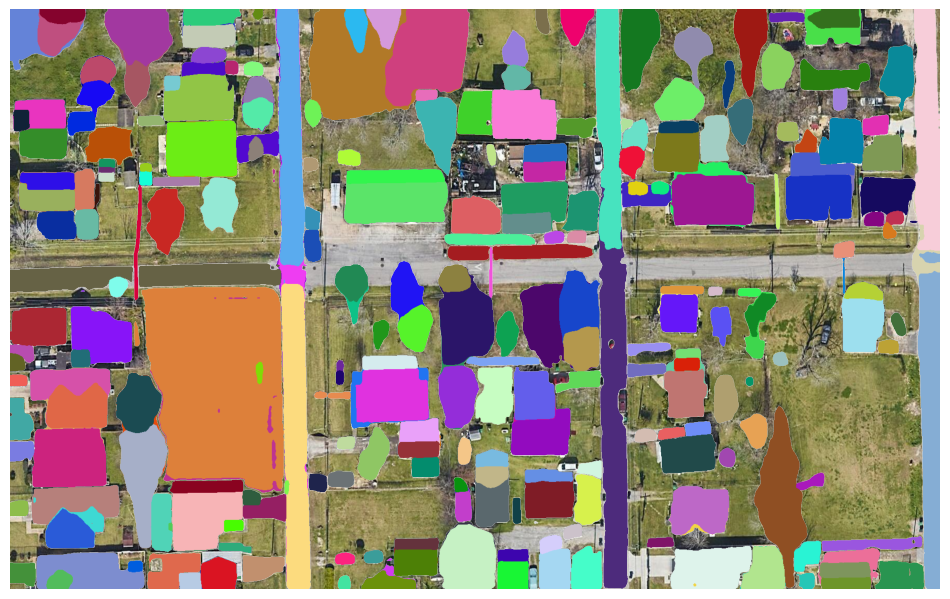

In [ ]:
# sam.show_masks(cmap="binary_r")
sam.show_anns(axis="off", alpha=1, output="ag_annotations.tif")

line string is a geometric types that is used in GIS - Post GIS - is an enhancement with the famous postgres database. GDAL powers many computational problems that we use in GIS


the prompts will be in the form of GeoJson data. for existing pipeline we have converted the data in COCO dataset format as lot of pipelines are engineered to use the COCO dataset used in comp vision

# ![](https://i.imgur.com/KAm84IY.png)

### Initialize SAM class

In [ ]:
sam = SamGeo(
    model_type="vit_h",
    checkpoint="sam_vit_h_4b8939.pth",
    sam_kwargs=None,
)

### Segment the image

Set `batch=True` to segment the image in batches. This is useful for large images that cannot fit in memory.

In [ ]:
sam.generate(
    image, output="segment.tif", batch=True, foreground=True, erosion_kernel=(3, 3), mask_multiplier=255
)

100%|██████████| 12/12 [01:31<00:00,  7.58s/it]


### Polygonize the raster data

Save the segmentation results as a GeoPackage file.

In [ ]:
vector = "segment.gpkg"
sam.tiff_to_gpkg(mask, vector, simplify_tolerance=None)

You can also save the segmentation results as any vector data format supported by GeoPandas.

In [ ]:
shapefile = "segment.shp"
sam.tiff_to_vector(mask, shapefile)

### Visualize the results

In [ ]:
%pip install segment-geospatial
import os
import leafmap
from samgeo import SamGeo, tms_to_geotiff, get_basemaps

m = leafmap.Map(center=[29.676840, -95.369222], zoom=19)
style = {
    "color": "#000000",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}

# *Download tif image file*
leafmap.download_file(
    url="https://github.com/opengeos/data/blob/main/naip/agriculture.tif",
    quiet=True,
    overwrite=True,
)

# Display the downloaded image on the map.
image = '/content/satellite.tif'
m.layers[-1].visible = False  # turn off the basemap
m.add_raster(image, layer_name="Image")

# Initialize SAM
sam = SamGeo(
    model_type="vit_h",
    checkpoint="sam_vit_h_4b8939.pth",
    sam_kwargs=None,
)

# Segment the image
mask = "segment.tif"
sam.generate(
    image, otuput=mask, batch=True, foreground=True, erosion_kernel=(3, 3), mask_multiplier=255
)

# Save the segmentation results as a GeoPackage file.
sam.tiff_to_gpkg(mask, output="segment.gpkg", simplify_tolerance=None)

m.add_vector(vector, layer_name="Vector", style=style)
m

Map(center=[29.67684, -95.369222], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

![](https://i.imgur.com/Ysq3u7E.png)

 Q:in the presence of large amount of segmented ground truths that potentially act as visual prompts, what is the value add of the foundatuional model as compared to the dedicated for the task model eg: UNET

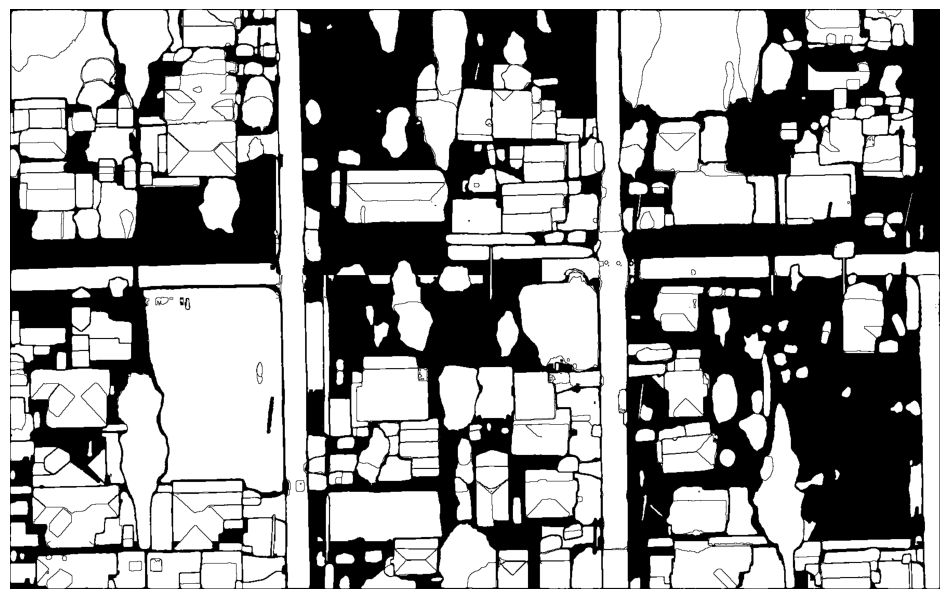

In [ ]:
sam.show_masks(cmap='binary_r')